# The Sparks Foundation: Data Science & Business Analytics Tasks

### Task 1: Prediction using Supervised Machine Learning
####  Predict the percentage of an student score based on the number of study hours.

### Auther: Mahmoud Yahia

In [1]:
# Importing the required libraries for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
# Importing the Dataset
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# find the Number of rows and columns in the dataset
df.shape

(25, 2)

In [4]:
#checking for any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Explore

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


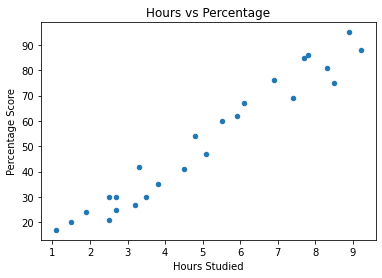

In [7]:
#plotting the distribution of scores
df.plot(x = 'Hours',y = 'Scores', kind='scatter')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Prepare The Data

Split data into training and test data

In [9]:
features = ["Hours"]
X_train = df[features]
X_train.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
target = ["Scores"]
y_train = df[target]
y_train.head()

,Scores
0,21
1,47
2,27
3,75
4,30


## Baseline

In [11]:
y_mean = y_train.mean()
y_mean

Scores    51.48
dtype: float64

In [12]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[0:5]

[Scores    51.48
 dtype: float64,
 Scores    51.48
 dtype: float64,
 Scores    51.48
 dtype: float64,
 Scores    51.48
 dtype: float64,
 Scores    51.48
 dtype: float64]

In [13]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt score", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt score Scores    51.48
dtype: float64
Baseline MAE: 22.42


## Iterate the Model

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

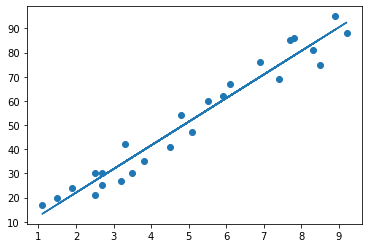

In [16]:
m=model.coef_
c=model.intercept_
x=df.iloc[:,:-1].values
y =df.iloc[:,1].values
line = m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Predictions

In [17]:
# tisting 
hours = 9.25
own_pred = model.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = [92.90985477]


C:\Users\M.Yahia\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluate

In [18]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527]])

In [19]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 4.97


# Thank You.